In [27]:
import pandas as pd

# Load the CSVs
trader_df = pd.read_csv("csv_files/trader_data.csv")
sentiment_df = pd.read_csv("csv_files/sentiment_data.csv")

# Display the first few rows of both datasets
print(" Trader Data Sample:")
display(trader_df.head())

print("\n Sentiment Data Sample:")
display(sentiment_df.head())


 Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



 Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [28]:
# Convert time columns to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Extract just the date (ignore time)
trader_df['date_only'] = trader_df['Timestamp'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

# Merge on 'date_only'
merged_df = pd.merge(trader_df, sentiment_df[['date_only', 'classification']], on='date_only', how='inner')

# Preview result
print(" Merged Data Sample:")
display(merged_df[['Timestamp', 'Account', 'Coin', 'Closed PnL', 'classification']].head())


 Merged Data Sample:


,Timestamp,Account,Coin,Closed PnL,classification


In [30]:
print(" Trader DataFrame Columns (again):")
for col in trader_df.columns:
    print(f"'{col}'")


 Trader DataFrame Columns (again):
'Account'
'Coin'
'Execution Price'
'Size Tokens'
'Size USD'
'Side'
'Timestamp IST'
'Start Position'
'Direction'
'Closed PnL'
'Transaction Hash'
'Order ID'
'Crossed'
'Fee'
'Trade ID'
'Timestamp'
'date_only'


In [31]:
# Check for nulls or invalid entries
print("Non-null values in 'Closed PnL':", merged_df['Closed PnL'].notna().sum())
print("\nUnique 'classification' values:")
print(merged_df['classification'].unique())

print("\nSample of valid Closed PnL by classification:")
display(merged_df[['Closed PnL', 'classification']].dropna().head(10))


Non-null values in 'Closed PnL': 0

Unique 'classification' values:
[]

Sample of valid Closed PnL by classification:


,Closed PnL,classification


In [32]:
# Strip and clean column names
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# Convert date columns
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Extract only date part
trader_df['date_only'] = trader_df['Timestamp'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date


In [34]:
print(" Trader Data Dates:")
print(trader_df['date_only'].min(), "→", trader_df['date_only'].max())

print("\n Sentiment Data Dates:")
print(sentiment_df['date_only'].min(), "→", sentiment_df['date_only'].max())


 Trader Data Dates:
1970-01-01 → 1970-01-01

 Sentiment Data Dates:
2018-02-01 → 2025-05-02


In [35]:
print("Raw trader 'Timestamp' values:")
print(trader_df['Timestamp'].unique()[:5])


Raw trader 'Timestamp' values:
<DatetimeArray>
['1970-01-01 00:28:50', '1970-01-01 00:29:00', '1970-01-01 00:29:10',
 '1970-01-01 00:28:30', '1970-01-01 00:28:40']
Length: 5, dtype: datetime64[ns]


In [36]:
print("Raw 'Timestamp IST' values:")
print(trader_df['Timestamp IST'].unique()[:5])


Raw 'Timestamp IST' values:
['02-12-2024 22:50' '02-12-2024 22:51' '02-12-2024 22:54'
 '02-12-2024 23:13' '02-12-2024 23:21']


In [37]:
# Parse 'Timestamp IST' using the correct format
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce')

# Extract just the date part
trader_df['date_only'] = trader_df['Timestamp'].dt.date

# Re-check trader dates
print(" Trader Data Dates (corrected):")
print(trader_df['date_only'].min(), "→", trader_df['date_only'].max())


 Trader Data Dates (corrected):
2023-05-01 → 2025-05-01


In [38]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only', 'classification']],
    on='date_only',
    how='inner'
)

print(" Rows after merge:", len(merged_df))
print(" Unique classification values:", merged_df['classification'].unique())


 Rows after merge: 211218
 Unique classification values: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral']


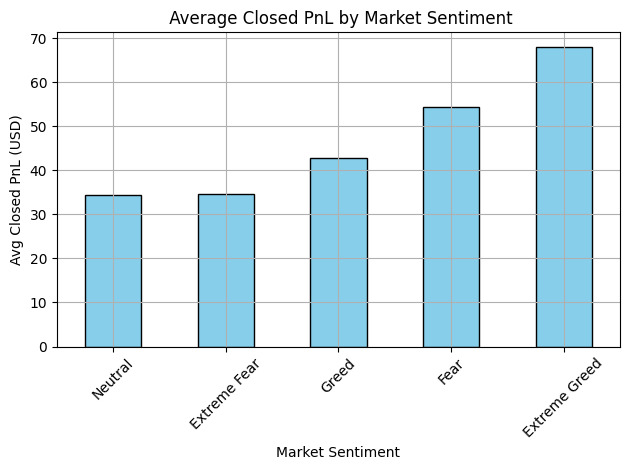

 Average PnL by Sentiment:

classification
Neutral          34.307718
Extreme Fear     34.537862
Greed            42.743559
Fear             54.290400
Extreme Greed    67.892861
Name: Closed PnL, dtype: float64


In [39]:
import matplotlib.pyplot as plt

# Clean column name
merged_df['Closed PnL'] = (
    merged_df['Closed PnL']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.strip()
)
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

# Group and plot
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

# Plot bar chart
avg_pnl.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(" Average Closed PnL by Market Sentiment")
plt.ylabel("Avg Closed PnL (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/avg_pnl_by_sentiment.png")
plt.show()

# Print actual values
print(" Average PnL by Sentiment:\n")
print(avg_pnl)


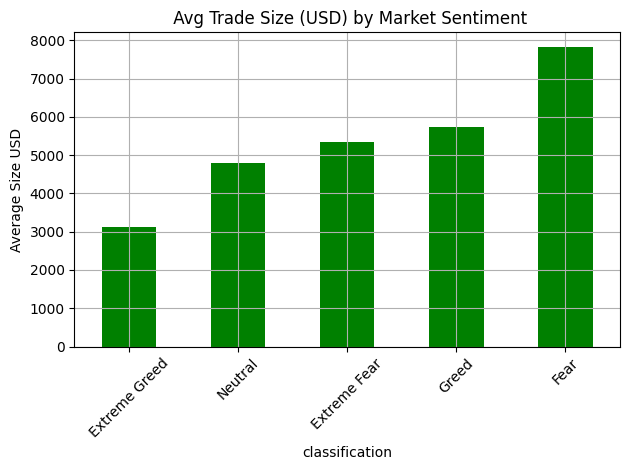

 Avg Size USD by Sentiment:
 classification
Extreme Greed    3112.251565
Neutral          4782.732661
Extreme Fear     5349.731843
Greed            5736.884375
Fear             7816.109931
Name: Size USD, dtype: float64


In [44]:
# Convert 'Size USD' to numeric
merged_df['Size USD'] = (
    merged_df['Size USD']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.strip()
)
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

# Group and plot
avg_size = merged_df.groupby('classification')['Size USD'].mean().sort_values()

avg_size.plot(kind='bar', color='green')
plt.title(" Avg Trade Size (USD) by Market Sentiment")
plt.ylabel("Average Size USD")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/avg_trade_size_by_sentiment.png")
plt.show()

print(" Avg Size USD by Sentiment:\n", avg_size)


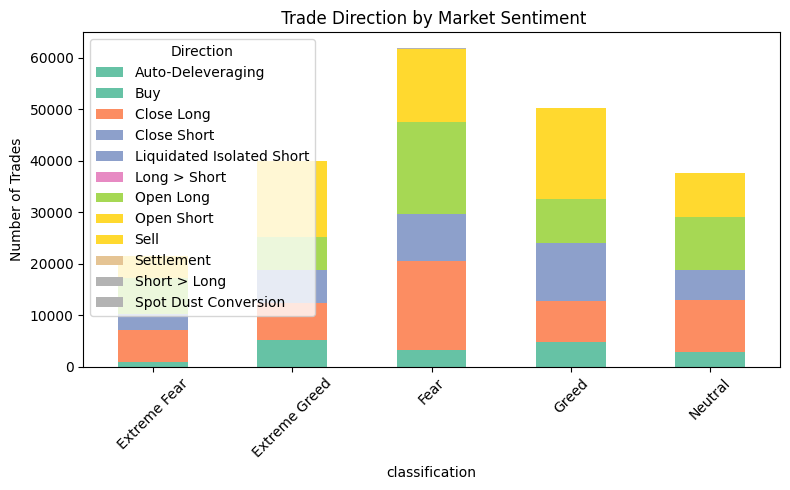

In [45]:
# Clean direction column (optional step)
merged_df['Direction'] = merged_df['Direction'].str.strip().str.title()

# Count long vs short per sentiment
direction_counts = merged_df.groupby(['classification', 'Direction']).size().unstack().fillna(0)

# Plot
direction_counts.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title(" Trade Direction by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/trade_direction_by_sentiment.png")
plt.show()


In [46]:
merged_df.to_csv("csv_files/merged_data.csv", index=False)
